> **NOTE:** This code is licensed under the GPL v3 license. Read more about it [here](/LICENSE).

# AFFP Model

## Import Statements

In [ ]:
import os

os.system(f"pip install -r {os.path.abspath(os.getcwd())}/requirements.txt")

In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

from datasets import dataset

2023-01-27 18:24:10.119751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading in training data

In [3]:
temp_train = np.asarray(dataset['Temperature'])
rh_train = np.asarray(dataset['RH'])
wind_train = np.asarray(dataset['Ws'])
rain_train = np.asarray(dataset['Rain'])

### Obtaining the x_train and y_train data ###

In [4]:
xData = np.column_stack((temp_train, rh_train, wind_train, rain_train))
yData = np.asarray(dataset['Classes'].apply(lambda x: 1 if x == 'fire' else 0))

x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25)

## Defining the Model

### Defining model layers and creating the model ###

In [5]:
input_shape = x_train.shape[1:]
inputs = Input(shape=input_shape)
x = Dense(32, activation='relu', kernel_regularizer='l1')(inputs)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

2023-01-27 18:24:35.002912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define the optimizer

In [6]:
optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.001,
	beta_1=0.9,
	beta_2=0.999,
	epsilon=1e-07
)

### Define the early stopping criteria

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### Compiling, training, and evaluating the model

In [8]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Verbose = 0 for minimal output
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/150
5/5 [==============================] - 1s 60ms/step - loss: 0.5710 - accuracy: 0.9315 - val_loss: 0.4391 - val_accuracy: 0.9730
Epoch 2/150
5/5 [==============================] - 0s 9ms/step - loss: 0.4970 - accuracy: 0.9658 - val_loss: 0.4414 - val_accuracy: 0.9730
Epoch 3/150
5/5 [==============================] - 0s 9ms/step - loss: 0.4540 - accuracy: 0.9658 - val_loss: 0.4453 - val_accuracy: 0.9730
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 0.4804 - accuracy: 0.9384 - val_loss: 0.4395 - val_accuracy: 0.9730
Epoch 5/150
5/5 [==============================] - 0s 10ms/step - loss: 0.4196 - accuracy: 0.9658 - val_loss: 0.4309 - val_accuracy: 0.9730
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.4119 - accuracy: 0.9726 - val_loss: 0.4278 - val_accuracy: 0.9730
Epoch 7/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3468 - accuracy: 0.9726 - val_loss: 0.4219 - val_accuracy: 0.9730
Epoch 8/150
5/5 [========

## View model summary

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


### Visualizing results

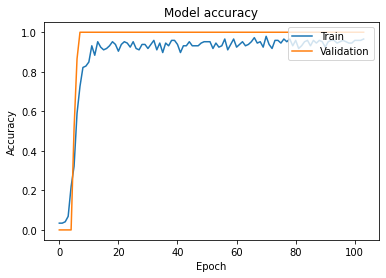

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

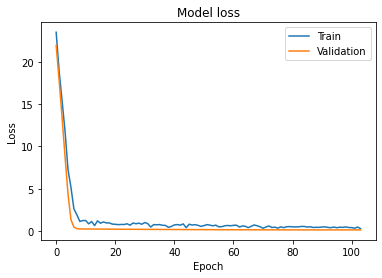

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()